In [1]:
import pandas as pd
df = pd.read_csv("data/RGS_raw_feedback.csv")
print(df)

    Would you be a scientist or engineer?  \
0                          Before playing   
1                                      No   
2                                     Yes   
3                                      No   
4                                      No   
..                                    ...   
107                                    No   
108                                    No   
109                                   Yes   
110                                   Yes   
111                                    No   

    Would you be a scientist or engineer?.1 I see science in my daily life  \
0                             After playing                 Before playing   
1                                        No                             No   
2                                        No                             No   
3                                        No                            Yes   
4                                        No                          

In [2]:
words = []
for a in df['Being a scientist means'].fillna(''):
    words = words + a.split()
print(words)

['Before', 'playing', 'Potions', 'Learning', 'more', 'about', 'living', 'things', 'and', 'testing', 'things', 'out', 'Finding', 'out', 'things', 'to', 'help', 'people', 'and', 'the', 'earth', 'Inventing', 'things', 'To', 'learn', 'and', 'have', 'knowledge', 'about', 'science.', 'Scientists', 'also', 'experiment', 'to', 'try', 'find', 'things', 'that', 'the', 'human', 'life', "hasn't", 'experimented', 'yet.', 'They', 'also', 'discover', 'things', 'that', 'happened', 'in', 'the', 'past.', 'I', 'think', 'being', 'a', 'scientist', 'means', 'creating', 'new', 'things', 'Experimenting', 'to', 'find', 'things', 'that', 'help', 'humanity', 'and', 'studying', 'for', 'ages', 'to', 'be', 'able', 'to', 'know', 'how', 'to', 'do', 'it', 'and', 'fix', 'it', 'if', 'it', 'goes', 'wrong.', 'Key', 'words:', 'experimenting,', 'theory,', 'curiosity,', 'knowledge,', 'study,', 'error,', 'intelligent,', 'trial,', 'fact', 'A', 'person', 'who', 'finds', 'solutions', 'to', 'problems', 'and', 'looks', 'into', 'th

In [4]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

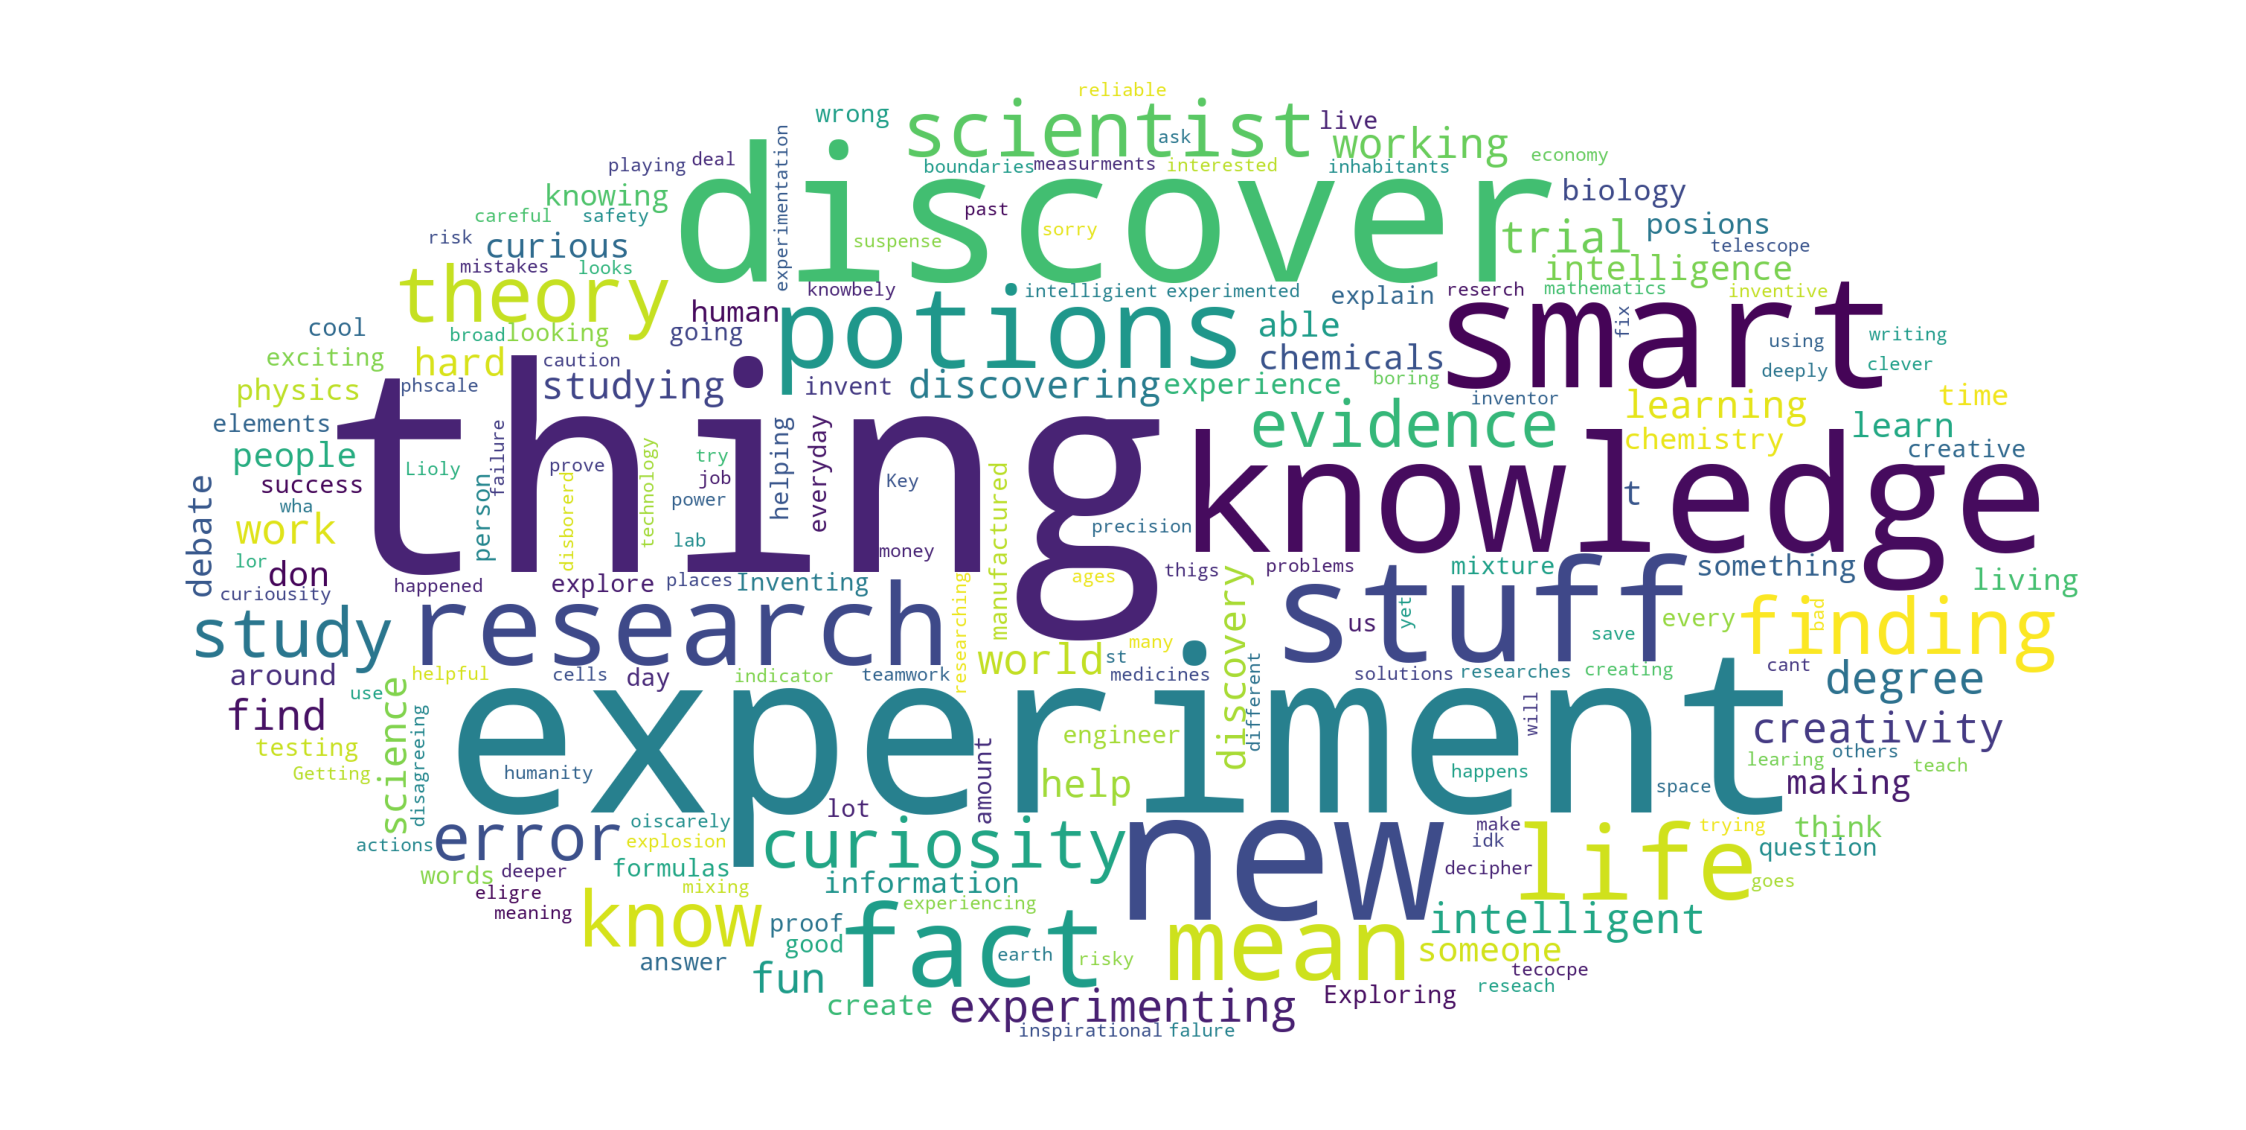

In [15]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np

x, y = np.ogrid[:3000, :3000]

mask = (x - 1500) ** 2 + (y - 1500) ** 2 > 1300 ** 2
mask = 255 * mask.astype(int)
mask = mask[::2,:]

img_out = WordCloud(width=3000,
                    height=2000,
                    random_state=1, 
                    background_color='white',
                    mask=mask,
                    colormap='viridis', 
                    collocations=False, 
                    stopwords=STOPWORDS)

img_out.generate(' '.join(words))

plot_cloud(img_out)

#destination File
#img_out.to_file("C:\\Users\\Paras\\Desktop\\py\\working\\img_out.png")